C:\Users\muhammad waseem\AppData\Local\Temp\ipykernel_13128\397880530.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(X['age'].mean(),inplace=True)


accuracy 0.7206703910614525
recall_score 0.6056338028169014
precision 0.6615384615384615
f1_score 0.6323529411764706


<Axes: >

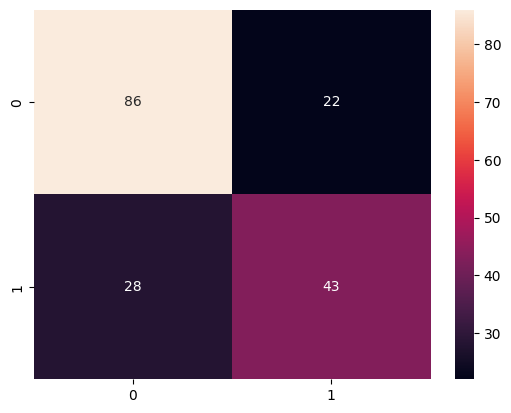

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,f1_score,recall_score
from sklearn import tree
df=sns.load_dataset('titanic')
X=df[['pclass','sex','sibsp','parch','fare','age']]
y=df['survived']
X=pd.get_dummies(X,columns=['sex'])
X.age.fillna(X['age'].mean(),inplace=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

hyper parametrical tuiting\
grid search closs validatipon 

random forest

accuracy 0.8100558659217877
recall_score 0.6901408450704225
precision 0.8032786885245902
f1_score 0.7424242424242424


<Axes: >

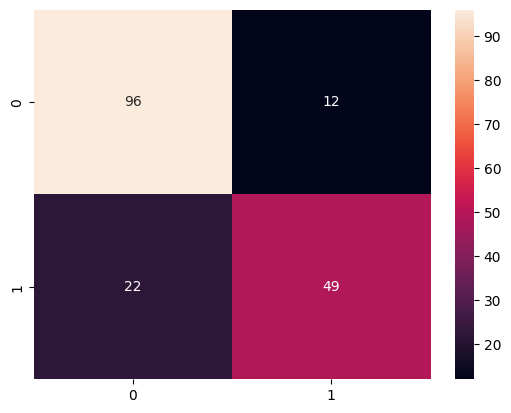

In [2]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

c:\Users\muhammad waseem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.8156424581005587
recall_score 0.7746478873239436
precision 0.7638888888888888
f1_score 0.7692307692307693


<Axes: >

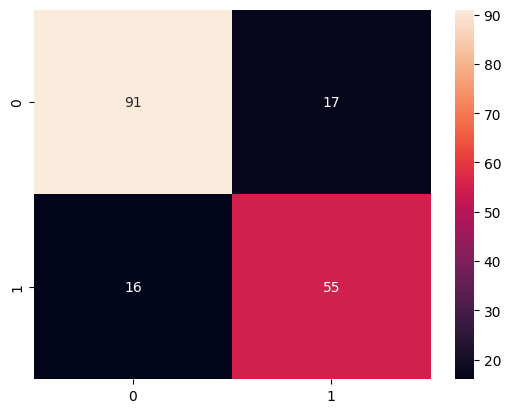

In [3]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

accuracy 0.6759776536312849
recall_score 0.3380281690140845
precision 0.6857142857142857
f1_score 0.4528301886792453


<Axes: >

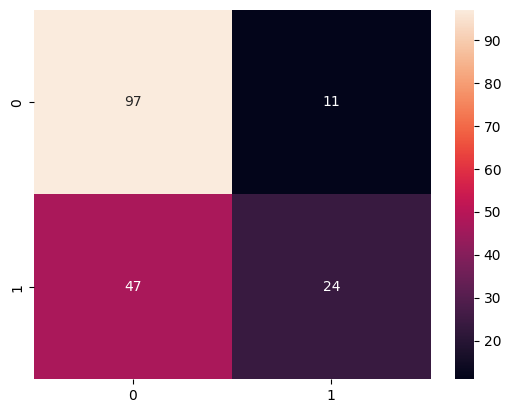

In [4]:
# spport vector machine it is called hyper plane
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

accuracy 0.8100558659217877
recall_score 0.8028169014084507
precision 0.7402597402597403
f1_score 0.7702702702702703


<Axes: >

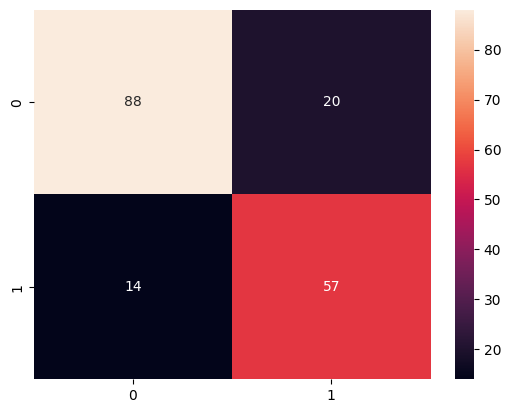

In [5]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

cross validation for different models by k method

In [6]:
# when its compare
#first import libaries
import  numpy as np
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import  train_test_split,cross_val_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import   SVC
models=(LinearRegression(),KNeighborsClassifier(),RandomForestClassifier(),SVC())
names=['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','SVC']
# k fold validation method
k=10
for name,model in zip(names,models):
    cv_score=cross_val_score(model,X_train,y_train,cv=k)
    print(f"{name}'cv accuracy':{np.mean(cv_score):.3f} +/- {np.std(cv_score):.3f}")







LogisticRegression'cv accuracy':0.354 +/- 0.095
KNeighborsClassifier'cv accuracy':0.721 +/- 0.030
RandomForestClassifier'cv accuracy':0.798 +/- 0.064
SVC'cv accuracy':0.680 +/- 0.048


hyper tuning

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10],
            'kernel':['linear','rbf'],
            'gamma':[0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(X_train,y_train)
print('best parameter:{}'.format(grid_search.best_params_))
print('best cross-validation score:{:.2f}'.format(grid_search.best_score_))

best parameter:{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
best cross-validation score:0.78
